<a href="https://colab.research.google.com/github/chaitanya18c/mnist-classification/blob/main/DL_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
single_image= X_train[0]
single_image.shape

(28, 28)

CHAITANYA P S
 212222230024


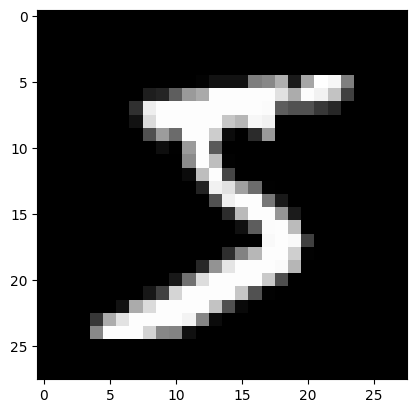

In [ ]:
print("CHAITANYA P S\n 212222230024")
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()

255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()

0.0

In [ ]:
X_train_scaled.max()

1.0

In [ ]:
y_train[0]

5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train_onehot.shape

(60000, 10)

CHAITANYA P S
 212222230024


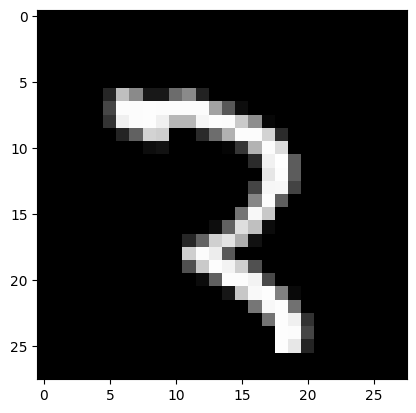

In [ ]:
print("CHAITANYA P S\n 212222230024")
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 20)                108180    
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
Total params: 108710 (424.65 KB)
Trainable params: 108710 (424.65 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0356 - accuracy: 0.9887 - val_loss: 0.0611 - val_accuracy: 0.9800
Epoch 2/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0297 - accuracy: 0.9908 - val_loss: 0.0473 - val_accuracy: 0.9854
Epoch 3/5
938/938 [==============================] - 13s 14ms/step - loss: 0.0255 - accuracy: 0.9919 - val_loss: 0.0536 - val_accuracy: 0.9830
Epoch 4/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0210 - accuracy: 0.9936 - val_loss: 0.0585 - val_accuracy: 0.9827
Epoch 5/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0178 - accuracy: 0.9945 - val_loss: 0.0458 - val_accuracy: 0.9858


In [ ]:
print("CHAITANYA P S\n 212222230024")
metrics = pd.DataFrame(model.history.history)
metrics.head()

CHAITANYA P S
 212222230024


,loss,accuracy,val_loss,val_accuracy
0,0.035556,0.988717,0.061069,0.9800
1,0.029665,0.990833,0.047293,0.9854
2,0.025478,0.991950,0.053607,0.9830
3,0.021016,0.993567,0.058460,0.9827
4,0.017827,0.994483,0.045850,0.9858


CHAITANYA P S
 212222230024


<Axes: >

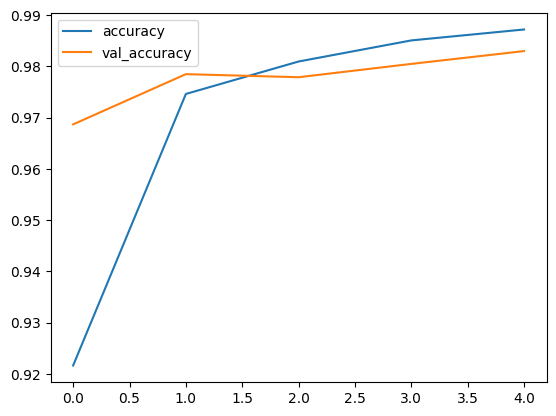

In [ ]:
print("CHAITANYA P S\n 212222230024")
metrics[['accuracy','val_accuracy']].plot()

CHAITANYA P S
 212222230024


<Axes: >

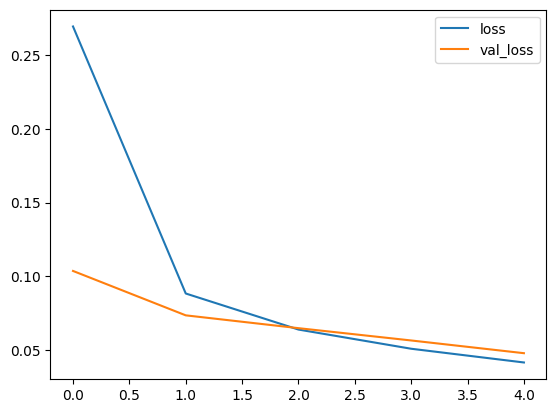

In [ ]:
print("CHAITANYA P S\n 212222230024")
metrics[['loss','val_loss']].plot()

In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 1s 4ms/step


In [ ]:
print("CHAITANYA P S\n 212222230024")
print(confusion_matrix(y_test,x_test_predictions))

CHAITANYA P S
 212222230024
[[ 963    1    2    1    1    1    6    1    1    3]
 [   0 1130    1    2    0    0    0    1    1    0]
 [   0    6  997    8    2    0    0    6   11    2]
 [   0    0    0 1000    0    5    0    0    5    0]
 [   1    0    1    0  971    0    5    0    1    3]
 [   1    0    1    6    0  874    5    0    4    1]
 [   3    3    0    0    1    3  947    0    1    0]
 [   0    1    8    3    1    1    0 1010    1    3]
 [   2    0    2    4    1    1    2    2  957    3]
 [   2    1    0    2    7    3    0    8    5  981]]


In [ ]:
print("CHAITANYA P S\n 212222230024")
print(classification_report(y_test,x_test_predictions))

CHAITANYA P S
 212222230024
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
img = image.load_img('8.jpg')

In [ ]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
img = image.load_img('8.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 15ms/step


In [ ]:
print(x_single_prediction)

[8]


CHAITANYA P S
 212222230024


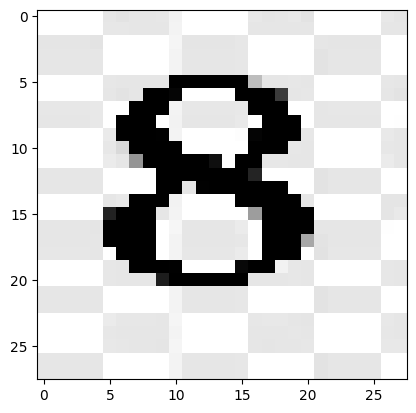

In [ ]:
print("CHAITANYA P S\n 212222230024")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape
X_test.shape
single_image= X_train[0]
single_image.shape
plt.imshow(single_image,cmap='gray')
y_train.shape
X_train.min()
X_train.max()
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0
X_train_scaled.min()
X_train_scaled.max()
y_train[0]
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)
type(y_train_onehot)
y_train_onehot.shape
print("CHAITANYA P S\n 212222230024")
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')
y_train_onehot[500]
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))
metrics = pd.DataFrame(model.history.history)
metrics.head()
metrics[['accuracy','val_accuracy']].plot()
metrics[['loss','val_loss']].plot()+--
x_test_predictions
print(confusion_matrix(y_test,x_test_predictions))
print(classification_report(y_test,x_test_predictions))
img = image.load_img('8.jpg')
type(img)
img = image.load_img('8.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)
print(x_single_prediction)
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)
print(x_single_prediction)

In [ ]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 14ms/step


In [ ]:
print(x_single_prediction)

[9]
